<a href="https://colab.research.google.com/github/happy-table/Machine-Learning/blob/main/reinforcement%20learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving rfl.csv to rfl.csv


**Load Dataset**

In [ ]:
rfl = pd.read_csv('rfl.csv')
rfl.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [ ]:
rfl.shape

(10000, 10)

## **Upper Confidence Bound**

In [ ]:
import math
observations = 10000
no_of_Ads = 10
ads_selected = []
numbers_of_selections_of_each_ads = [0] * no_of_Ads  # Track how many times each ad is selected
sums_of_rewards_of_each_ads = [0] * no_of_Ads # Cumulative rewards for each ad
total_reward = 0  # Total reward from all rounds
for n in range(0, observations):   # Loop over each round
    ad = 0
    max_upper_bound = 0
    for i in range(0, no_of_Ads):  # Loop over each ad
        if (numbers_of_selections_of_each_ads[i] > 0):
            # Calculate average reward and uncertainty (delta_i)
            average_reward = sums_of_rewards_of_each_ads[i] / numbers_of_selections_of_each_ads[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections_of_each_ads[i])  #Exploration term → ensures we explore less tried ads
            upper_bound = average_reward + delta_i  #Confidence bound = Exploitation + Exploration
        else:
            upper_bound = 1e400 # Very high value to ensure each ad is selected at least once
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections_of_each_ads[ad] = numbers_of_selections_of_each_ads[ad] + 1
    reward = rfl.values[n, ad]
    sums_of_rewards_of_each_ads[ad] = sums_of_rewards_of_each_ads[ad] + reward
    total_reward = total_reward + reward

print("Rewards by Ads = ",sums_of_rewards_of_each_ads)
print("Total Rewards by UCB = ",total_reward)
print("Ads selected at each round:",ads_selected)

Rewards by Ads =  [np.int64(120), np.int64(47), np.int64(7), np.int64(38), np.int64(1675), np.int64(1), np.int64(27), np.int64(236), np.int64(20), np.int64(7)]
Total Rewards by UCB =  2178
Ads selected at each round: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 0, 8, 1, 2, 3, 4, 5, 6, 6, 7, 7, 7, 9, 7, 0, 6, 8, 1, 2, 3, 4, 4, 4, 4, 4, 5, 9, 7, 0, 0, 6, 8, 4, 0, 7, 1, 1, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 7, 7, 7, 7, 7, 4, 2, 3, 5, 9, 1, 6, 8, 0, 0, 7, 0, 4, 1, 6, 8, 2, 3, 5, 9, 7, 0, 4, 4, 4, 7, 7, 7, 7, 1, 6, 8, 2, 3, 5, 9, 0, 7, 7, 4, 7, 7, 7, 1, 6, 8, 0, 4, 4, 2, 3, 5, 9, 4, 7, 0, 7, 1, 1, 1, 6, 6, 6, 6, 6, 8, 4, 2, 3, 5, 9, 7, 7, 7, 0, 6, 4, 1, 1, 1, 8, 7, 2, 3, 5, 9, 4, 0, 1, 1, 1, 6, 7, 8, 4, 1, 2, 3, 5, 9, 0, 6, 7, 8, 4, 7, 1, 0, 6, 2, 3, 5, 9, 7, 7, 7, 7, 4, 4, 4, 4, 4, 7, 8, 1, 0, 6, 6, 6, 7, 4, 2, 3, 5, 9, 1, 6, 8, 7, 0, 4, 4, 4, 4, 4, 2, 3, 5, 9, 1, 6, 7, 4, 8, 0, 7, 4, 4, 4, 1, 6, 2, 3, 5, 9, 0, 0,

# **Visualising Graph**

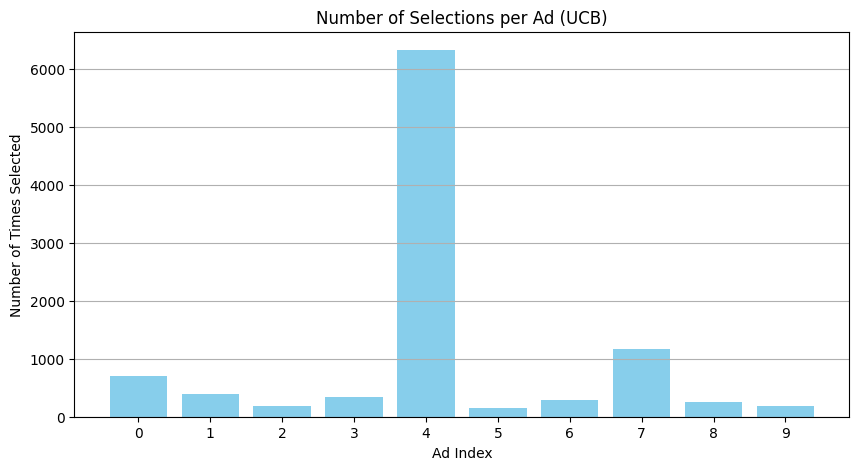

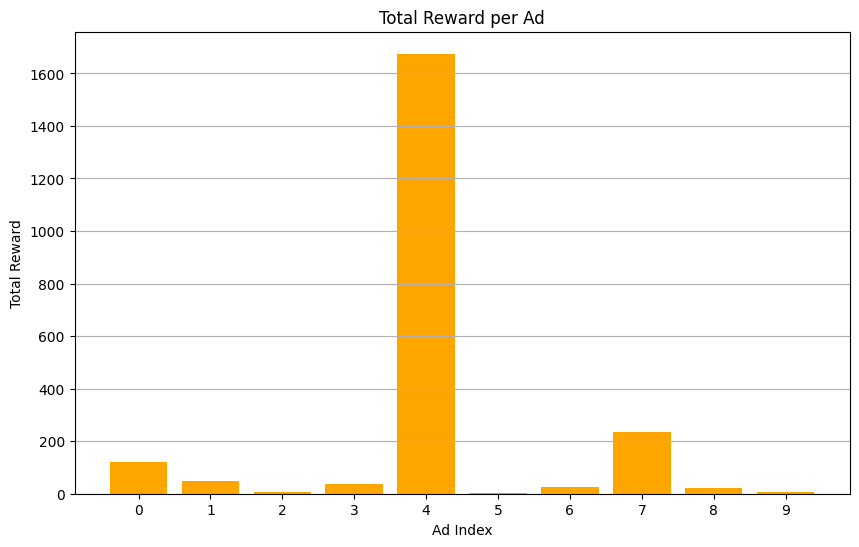

Total Reward collected using UCB: 2178
Ad selection counts: [705, 387, 186, 345, 6323, 150, 292, 1170, 256, 186]
Reward per ad: [np.int64(120), np.int64(47), np.int64(7), np.int64(38), np.int64(1675), np.int64(1), np.int64(27), np.int64(236), np.int64(20), np.int64(7)]


In [ ]:
import math
observations = 10000
no_of_Ads = 10
# Step 2: UCB Algorithm
ads_selected = []
numbers_of_selections = [0] * no_of_Ads
sums_of_rewards = [0] * no_of_Ads
total_reward = 0

for n in range(0, observations):
    ad = 0
    max_upper_bound = 0
    for i in range(0, no_of_Ads ):
        if numbers_of_selections[i] > 0:
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400  # force to try each ad at least once
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = rfl.values[n, ad]
    sums_of_rewards[ad] += reward
    total_reward += reward

# Step 3: Visualizations

#1. Bar chart: Ad selections
plt.figure(figsize=(10, 6))
plt.bar(range(no_of_Ads ), numbers_of_selections, color='skyblue')
plt.xlabel('Ad Index')
plt.ylabel('Number of Times Selected')
plt.title('Number of Selections per Ad (UCB)')
plt.xticks(range(no_of_Ads ))
plt.grid(axis='y')
plt.show()

#2. Bar chart: Rewards per Ad
plt.figure(figsize=(10, 6))
plt.bar(range(no_of_Ads ), sums_of_rewards, color='orange')
plt.xlabel('Ad Index')
plt.ylabel('Total Reward')
plt.title('Total Reward per Ad')
plt.xticks(range(no_of_Ads ))
plt.grid(axis='y')
plt.show()

#3. Print Summary
print("Total Reward collected using UCB:", total_reward)
print("Ad selection counts:", numbers_of_selections)
print("Reward per ad:", sums_of_rewards)
